In [62]:
# using datetime module 
import datetime; 
  
# ct stores current time 
ct = datetime.datetime.now() 
print("current time:-", ct) 
  
# ts store timestamp of current time 
ts = ct.timestamp() 
print("timestamp:-", ts) 

current time:- 2021-03-17 18:11:52.761650
timestamp:- 1615984912.76165


In [130]:
print("Vaishnavi Shinde")
print("1132200485")

Vaishnavi Shinde
1132200485


In [262]:
#import libraries

#NUmber crunching
import pandas as pd
import numpy as np

#Plots and graphs
import matplotlib.pyplot as plt  
import seaborn as sns

#Model building
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
#Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [263]:
%cd D:\NOTES\SEM 3\Lab On ML 2\Dataset

D:\NOTES\SEM 3\Lab On ML 2\Dataset


In [264]:
db_test=pd.read_csv('testing.csv')
db_train=pd.read_csv('training.csv')
db_train.shape,db_test.shape

((4339, 6), (500, 6))

In [265]:
db_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       500 non-null    object 
 1   GLCM_pan    500 non-null    float64
 2   Mean_Green  500 non-null    float64
 3   Mean_Red    500 non-null    float64
 4   Mean_NIR    500 non-null    float64
 5   SD_pan      500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


array([[<AxesSubplot:title={'center':'GLCM_pan'}>,
        <AxesSubplot:title={'center':'Mean_Green'}>],
       [<AxesSubplot:title={'center':'Mean_Red'}>,
        <AxesSubplot:title={'center':'Mean_NIR'}>],
       [<AxesSubplot:title={'center':'SD_pan'}>, <AxesSubplot:>]],
      dtype=object)

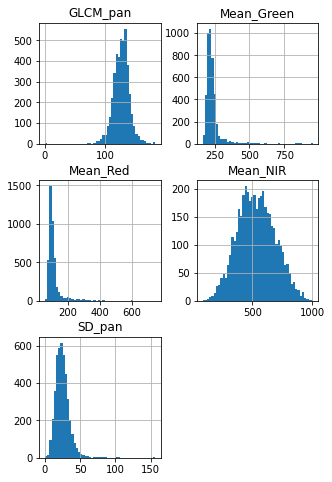

In [266]:
db_train.hist(bins=50,figsize=(5,8))

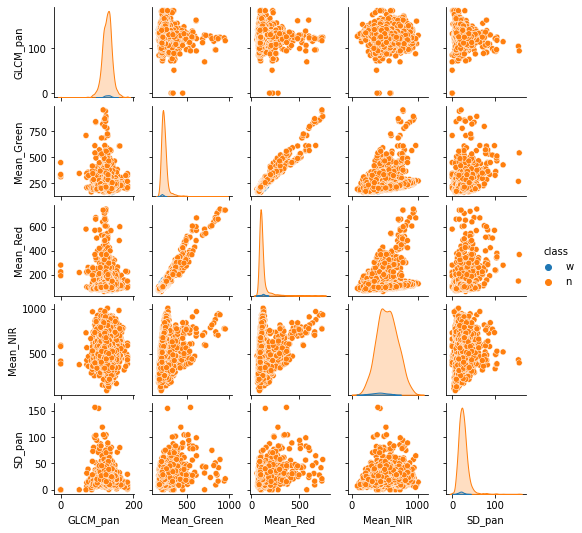

In [267]:
sns.pairplot(db_train,hue='class',height=1.5)

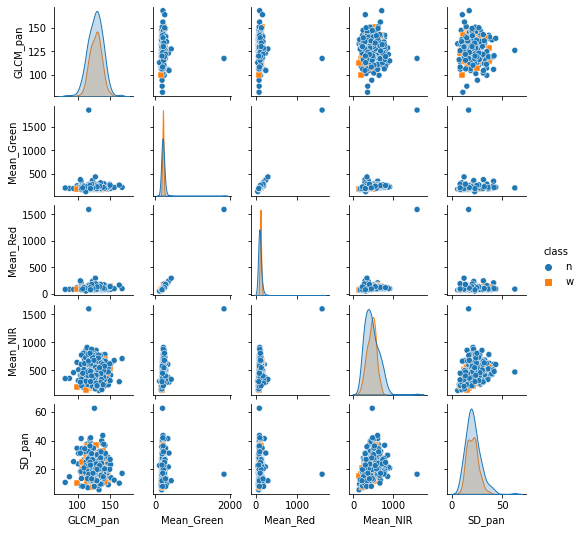

In [268]:
sns.pairplot(db_test,hue="class",markers=['o','s'],height=1.5
)

In [269]:
ds_corr_matrix = db_train.corr()
ds_corr_matrix

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
GLCM_pan,1.000000,-0.122384,-0.107166,-0.094263,-0.065023
Mean_Green,-0.122384,1.000000,0.964682,0.223518,0.246103
Mean_Red,-0.107166,0.964682,1.000000,0.121230,0.254383
Mean_NIR,-0.094263,0.223518,0.121230,1.000000,0.120276
SD_pan,-0.065023,0.246103,0.254383,0.120276,1.000000


<AxesSubplot:>

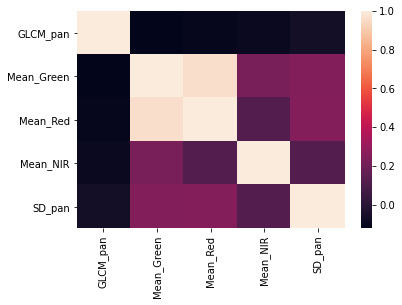

In [270]:
sns.heatmap(ds_corr_matrix)

In [271]:
db_train.columns

Index(['class', 'GLCM_pan', 'Mean_Green', 'Mean_Red', 'Mean_NIR', 'SD_pan'], dtype='object')

In [272]:
db_test.columns

Index(['class', 'GLCM_pan', 'Mean_Green', 'Mean_Red', 'Mean_NIR', 'SD_pan'], dtype='object')

# Train Test split

In [273]:
# The drop() function that we use, will return a copy of the modified dataset without the dropped column. 
# Original dataset is not impacted at all.

X_train = db_train.drop("class", axis=1) 

In [274]:
X_train.head()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,120.362774,205.500000,119.395349,416.581395,20.676318
1,124.739583,202.800000,115.333333,354.333333,16.707151
2,134.691964,199.285714,116.857143,477.857143,22.496712
3,127.946309,178.368421,92.368421,278.473684,14.977453
4,135.431548,197.000000,112.690476,532.952381,17.604193


In [275]:
y_train = db_train["class"].copy()

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [277]:
print(X_train.shape )

(3471, 5)


In [278]:
print(X_test.shape )

(868, 5)


In [279]:
print(y_train.shape )

(3471,)


In [280]:
print(y_test.shape )

(868,)


### Using KNN

#### For neighbours=5 with euclidean distance and algorithm=ball_tree

In [281]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [282]:
print(knnclassifier.predict(X_test))

['n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'w' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'w' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'w'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n

In [283]:
knnclassifier.score(X_test,y_test)

0.9873271889400922

In [284]:
knnclassifier

KNeighborsClassifier()

In [285]:
knnclassifier = KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='ball_tree')
knnclassifier.fit(X_train, y_train)
knnclassifier.score(X_test,y_test)


0.9873271889400922

In [286]:
k_values = np.arange(1,100,2)
print(k_values)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


In [287]:
train_score_arr = []
val_score_arr = []

for k in k_values:
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    
    # We evaluate the performance of model, for each k - value
    train_score = model.score(X_train, y_train) 
    train_score_arr.append(train_score*100)
    
    val_score = model.score(X_test, y_test)
    val_score_arr.append(val_score*100)
    
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, val_score*100))

k=1, train_accuracy=100.00%, test_accuracy=98.85%
k=3, train_accuracy=99.57%, test_accuracy=98.85%
k=5, train_accuracy=99.39%, test_accuracy=98.73%
k=7, train_accuracy=99.31%, test_accuracy=98.39%
k=9, train_accuracy=99.25%, test_accuracy=98.39%
k=11, train_accuracy=99.02%, test_accuracy=98.39%
k=13, train_accuracy=98.96%, test_accuracy=98.39%
k=15, train_accuracy=98.73%, test_accuracy=98.39%
k=17, train_accuracy=98.53%, test_accuracy=98.27%
k=19, train_accuracy=98.53%, test_accuracy=98.16%
k=21, train_accuracy=98.33%, test_accuracy=98.16%
k=23, train_accuracy=98.33%, test_accuracy=98.16%
k=25, train_accuracy=98.33%, test_accuracy=98.16%
k=27, train_accuracy=98.33%, test_accuracy=98.16%
k=29, train_accuracy=98.33%, test_accuracy=98.16%
k=31, train_accuracy=98.33%, test_accuracy=98.16%
k=33, train_accuracy=98.33%, test_accuracy=98.16%
k=35, train_accuracy=98.33%, test_accuracy=98.16%
k=37, train_accuracy=98.33%, test_accuracy=98.16%
k=39, train_accuracy=98.33%, test_accuracy=98.16%
k=41

Text(0, 0.5, 'Accuracy')

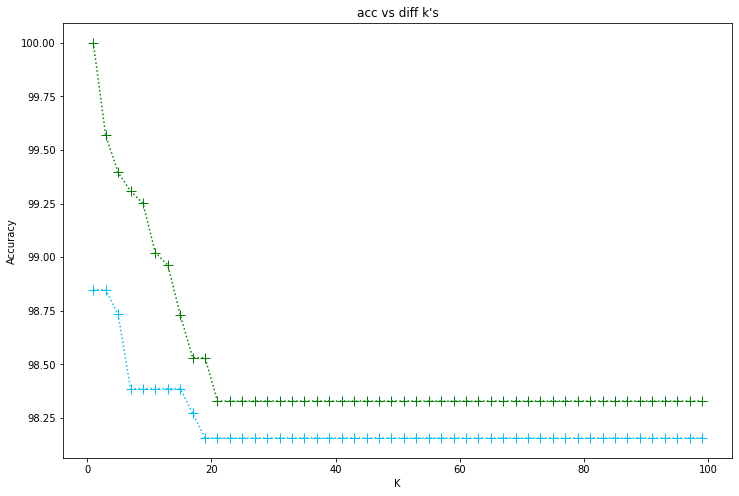

In [290]:
plt.figure(figsize=(12,8))
plt.plot(k_values,train_score_arr,color="green",linestyle="dotted",marker="+",markersize=10)
plt.plot(k_values,val_score_arr,color="deepskyblue",linestyle="dotted",marker="+",markersize=10)
plt.title("acc vs diff k's")
plt.xlabel('K')
plt.ylabel('Accuracy')


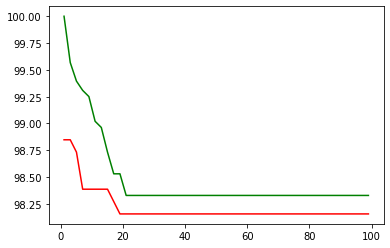

In [291]:
plt.plot(k_values,train_score_arr,'g')
plt.plot(k_values,val_score_arr,'r')

In [292]:
from sklearn.metrics import classification_report,confusion_matrix
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))


[[852   0]
 [ 11   5]]
              precision    recall  f1-score   support

           n       0.99      1.00      0.99       852
           w       1.00      0.31      0.48        16

    accuracy                           0.99       868
   macro avg       0.99      0.66      0.73       868
weighted avg       0.99      0.99      0.98       868



#### For euclidean distance from k=5 test accuracy starts decreasing and also from k=19 test accuracy is constant .

### For Neighbours = 20,algorithm='kd_tree',p=1 Manhattan distance


from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=20)
knnclassifier.fit(X_train, y_train)

print(knnclassifier.predict(X_test))

knnclassifier.score(X_test,y_test)

knnclassifier

In [293]:
knnclassifier = KNeighborsClassifier(n_neighbors=20,weights='distance',algorithm='kd_tree',p=1)
knnclassifier.fit(X_train, y_train)
knnclassifier.score(X_test,y_test)

0.9838709677419355

In [294]:
k_values = np.arange(1,100,2)
print(k_values)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


In [295]:
train_score_arr = []
val_score_arr = []

for k in k_values:
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    
    # We evaluate the performance of model, for each k - value
    train_score = model.score(X_train, y_train) 
    train_score_arr.append(train_score*100)
    
    val_score = model.score(X_test, y_test)
    val_score_arr.append(val_score*100)
    
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, val_score*100))

k=1, train_accuracy=100.00%, test_accuracy=98.85%
k=3, train_accuracy=99.57%, test_accuracy=98.85%
k=5, train_accuracy=99.39%, test_accuracy=98.73%
k=7, train_accuracy=99.31%, test_accuracy=98.39%
k=9, train_accuracy=99.25%, test_accuracy=98.39%
k=11, train_accuracy=99.02%, test_accuracy=98.39%
k=13, train_accuracy=98.96%, test_accuracy=98.39%
k=15, train_accuracy=98.73%, test_accuracy=98.39%
k=17, train_accuracy=98.53%, test_accuracy=98.27%
k=19, train_accuracy=98.53%, test_accuracy=98.16%
k=21, train_accuracy=98.33%, test_accuracy=98.16%
k=23, train_accuracy=98.33%, test_accuracy=98.16%
k=25, train_accuracy=98.33%, test_accuracy=98.16%
k=27, train_accuracy=98.33%, test_accuracy=98.16%
k=29, train_accuracy=98.33%, test_accuracy=98.16%
k=31, train_accuracy=98.33%, test_accuracy=98.16%
k=33, train_accuracy=98.33%, test_accuracy=98.16%
k=35, train_accuracy=98.33%, test_accuracy=98.16%
k=37, train_accuracy=98.33%, test_accuracy=98.16%
k=39, train_accuracy=98.33%, test_accuracy=98.16%
k=41

Text(0, 0.5, 'Accuracy')

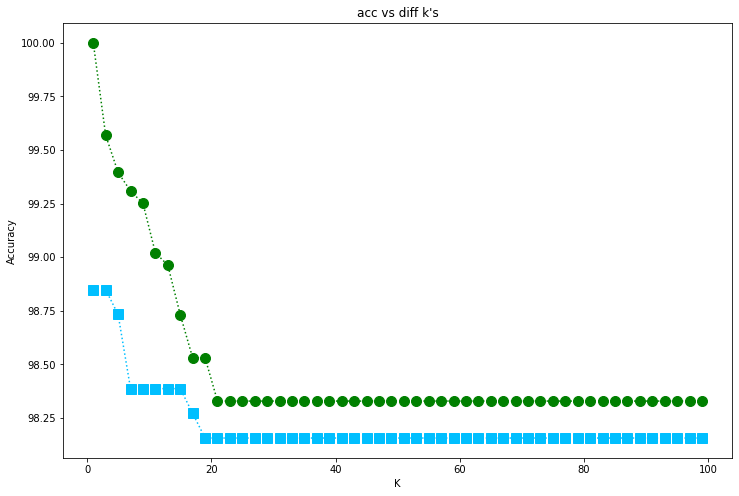

In [296]:
plt.figure(figsize=(12,8))
plt.plot(k_values,train_score_arr,color="green",linestyle="dotted",marker="o",markersize=10)
plt.plot(k_values,val_score_arr,color="deepskyblue",linestyle="dotted",marker="s",markersize=10)
plt.title("acc vs diff k's")
plt.xlabel('K')
plt.ylabel('Accuracy')


#### For Manhattan distance from k=5 test accuracy starts decreasing and also from k=19 test accuracy is constant .

# Applying Standardization

In [297]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [298]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='ball_tree')
knnclassifier.fit(X_train, y_train)
pr=knnclassifier.predict(X_test)
print(confusion_matrix(y_test,pr))

[[852   0]
 [ 11   5]]


In [299]:
knnclassifier.score(X_test,y_test)

0.9873271889400922

In [300]:
k_values = np.arange(1,100,2)
print(k_values)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


In [301]:
train_score_arr = []
val_score_arr = []

for k in k_values:
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    
    # We evaluate the performance of model, for each k - value
    train_score = model.score(X_train, y_train) 
    train_score_arr.append(train_score*100)
    
    val_score = model.score(X_test, y_test)
    val_score_arr.append(val_score*100)
    
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, val_score*100))

k=1, train_accuracy=100.00%, test_accuracy=98.39%
k=3, train_accuracy=99.45%, test_accuracy=98.85%
k=5, train_accuracy=99.14%, test_accuracy=98.73%
k=7, train_accuracy=98.93%, test_accuracy=98.62%
k=9, train_accuracy=98.62%, test_accuracy=98.39%
k=11, train_accuracy=98.59%, test_accuracy=98.39%
k=13, train_accuracy=98.56%, test_accuracy=98.27%
k=15, train_accuracy=98.53%, test_accuracy=98.27%
k=17, train_accuracy=98.50%, test_accuracy=98.27%
k=19, train_accuracy=98.47%, test_accuracy=98.27%
k=21, train_accuracy=98.39%, test_accuracy=98.27%
k=23, train_accuracy=98.39%, test_accuracy=98.16%
k=25, train_accuracy=98.36%, test_accuracy=98.16%
k=27, train_accuracy=98.33%, test_accuracy=98.16%
k=29, train_accuracy=98.33%, test_accuracy=98.16%
k=31, train_accuracy=98.33%, test_accuracy=98.16%
k=33, train_accuracy=98.33%, test_accuracy=98.16%
k=35, train_accuracy=98.33%, test_accuracy=98.16%
k=37, train_accuracy=98.33%, test_accuracy=98.16%
k=39, train_accuracy=98.33%, test_accuracy=98.16%
k=41

Text(0, 0.5, 'Accuracy')

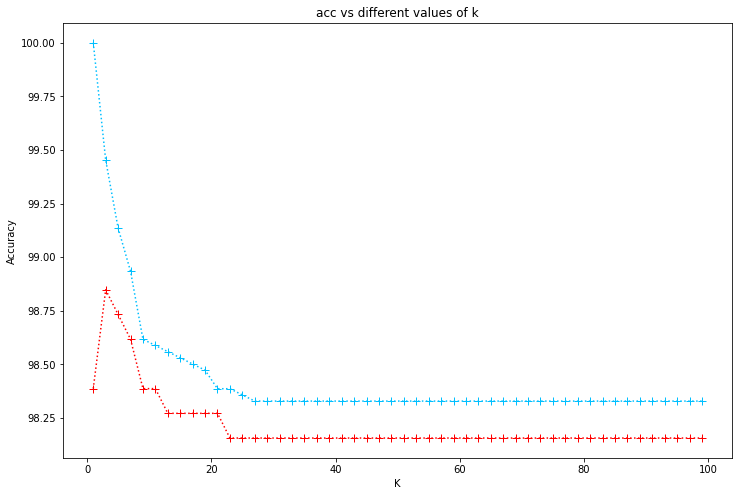

In [317]:
plt.figure(figsize=(12,8))
plt.plot(k_values,train_score_arr,color="deepskyblue",linestyle="dotted",marker="+",markersize=8)
plt.plot(k_values,val_score_arr,color="red",linestyle="dotted",marker="+",markersize=8)
plt.title("acc vs different values of k")
plt.xlabel('K')
plt.ylabel('Accuracy')

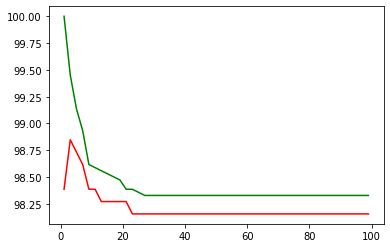

In [303]:
plt.plot(k_values,train_score_arr,'g')
plt.plot(k_values,val_score_arr,'r')

##### when we compare the results of with standardization and without standardization for neighbours =5 with euclidean distance we got same accuracy of 0.98 

#### Now for comparing with and without standardization for neighbours=20

In [305]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=20,weights='distance',algorithm='kd_tree',p=1)
knnclassifier.fit(X_train, y_train)
pr=knnclassifier.predict(X_test)
print(confusion_matrix(y_test,pr))

[[852   0]
 [ 15   1]]


In [306]:
knnclassifier.score(X_test,y_test)

0.9827188940092166

In [307]:
k_values = np.arange(1,100,2)
print(k_values)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]


In [308]:
train_score_arr = []
val_score_arr = []

for k in k_values:
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    
    # We evaluate the performance of model, for each k - value
    train_score = model.score(X_train, y_train) 
    train_score_arr.append(train_score*100)
    
    val_score = model.score(X_test, y_test)
    val_score_arr.append(val_score*100)
    
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, val_score*100))

k=1, train_accuracy=100.00%, test_accuracy=98.39%
k=3, train_accuracy=99.45%, test_accuracy=98.85%
k=5, train_accuracy=99.14%, test_accuracy=98.73%
k=7, train_accuracy=98.93%, test_accuracy=98.62%
k=9, train_accuracy=98.62%, test_accuracy=98.39%
k=11, train_accuracy=98.59%, test_accuracy=98.39%
k=13, train_accuracy=98.56%, test_accuracy=98.27%
k=15, train_accuracy=98.53%, test_accuracy=98.27%
k=17, train_accuracy=98.50%, test_accuracy=98.27%
k=19, train_accuracy=98.47%, test_accuracy=98.27%
k=21, train_accuracy=98.39%, test_accuracy=98.27%
k=23, train_accuracy=98.39%, test_accuracy=98.16%
k=25, train_accuracy=98.36%, test_accuracy=98.16%
k=27, train_accuracy=98.33%, test_accuracy=98.16%
k=29, train_accuracy=98.33%, test_accuracy=98.16%
k=31, train_accuracy=98.33%, test_accuracy=98.16%
k=33, train_accuracy=98.33%, test_accuracy=98.16%
k=35, train_accuracy=98.33%, test_accuracy=98.16%
k=37, train_accuracy=98.33%, test_accuracy=98.16%
k=39, train_accuracy=98.33%, test_accuracy=98.16%
k=41

Text(0, 0.5, 'Accuracy')

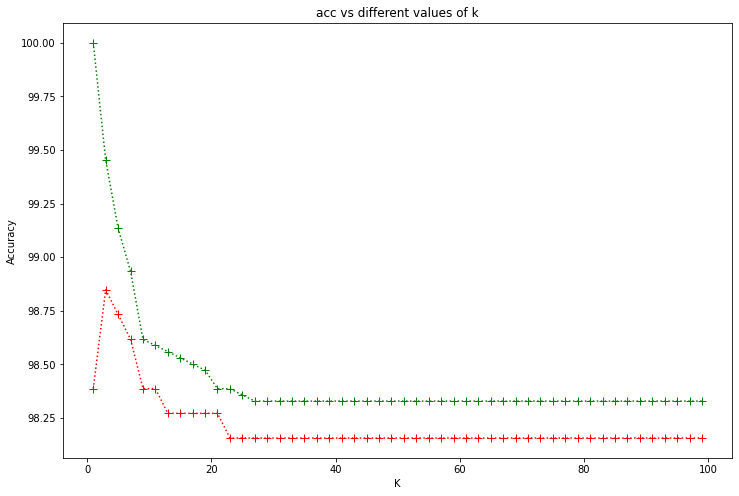

In [318]:
plt.figure(figsize=(12,8))
plt.plot(k_values,train_score_arr,color="Green",linestyle="dotted",marker="+",markersize=8)
plt.plot(k_values,val_score_arr,color="red",linestyle="dotted",marker="+",markersize=8)
plt.title("acc vs different values of k")
plt.xlabel('K')
plt.ylabel('Accuracy')

###### And Now when we compare the results of with  standardization for k=20 with Manhattan distance we got accuracy of 0.9827 and without standardization we got 0.9838 .So after standardization the Suitable K value can be said is 3 where accuracy is 0.98 

In [319]:
# using datetime module 
import datetime; 
  
# ct stores current time 
ct = datetime.datetime.now() 
print("current time:-", ct) 
  
# ts store timestamp of current time 
ts = ct.timestamp() 
print("timestamp:-", ts) 

current time:- 2021-03-17 21:04:19.539062
timestamp:- 1615995259.539062
